- embeddigns logistic (leniar)
- embeeddings xboost  (non leneiar)
- embedding essemble
- embeddings nn
- embeddings tuning

### Aanlysis

In [ ]:
import pandas as pd
# Read the CSV files
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train

,product_id,text_clean,label
0,114704,hornady unprimed winchester cartridge case hor...,2.0
1,250731,tachikara tk leopard knee pad tachikara tk leo...,11.0
2,152967,g asd replacement cutter aluminum amp carbon u...,2.0
3,4541,mtech usa mt tactical folding knife inch close...,2.0
4,142062,nhl pittsburgh penguins game day black pro sha...,7.0
...,...,...,...
38233,181504,frog hair fluorocarbon tippet m spool assorted...,2.0
38234,33425,yakima crashpad truck bed pad black medium tru...,1.0
38235,107824,pittsburgh pirates official mlb quotxquot car ...,7.0
38236,207684,mlb kansas city royal artissimo kaufman stadiu...,7.0


In [ ]:
df_test

,product_id,text_clean,label
0,56218,katz hoodie volleyball,0
1,42346,vz grip operator ii standard size gun grip usa...,2
2,215842,tough flat leather hobble tough flat leather h...,15
3,36062,buzzrack skipper bicycle suv hatchback wheel c...,1
4,188250,cuisinart cgg allfood btu portable outdoor tab...,10
...,...,...,...
36397,32546,dolfin grafika poly reversible chloroban polye...,4
36398,158260,new black lace embroidery uv protection sun bl...,10
36399,270154,tnt room cabin tent xx room cabin tent sleep l...,10
36400,241734,schrade badger knife quot overall length fix b...,2


In [ ]:
df_all = pd.concat([df_train, df_test], ignore_index=True)
df_all

,product_id,text_clean,label
0,114704,hornady unprimed winchester cartridge case hor...,2.0
1,250731,tachikara tk leopard knee pad tachikara tk leo...,11.0
2,152967,g asd replacement cutter aluminum amp carbon u...,2.0
3,4541,mtech usa mt tactical folding knife inch close...,2.0
4,142062,nhl pittsburgh penguins game day black pro sha...,7.0
...,...,...,...
74635,32546,dolfin grafika poly reversible chloroban polye...,4.0
74636,158260,new black lace embroidery uv protection sun bl...,10.0
74637,270154,tnt room cabin tent xx room cabin tent sleep l...,10.0
74638,241734,schrade badger knife quot overall length fix b...,2.0


In [ ]:
#lenght
df_all['length'] = df_all['text_clean'].str.len()
df_all

,product_id,text_clean,label,length
0,114704,hornady unprimed winchester cartridge case hor...,2.0,551.0
1,250731,tachikara tk leopard knee pad tachikara tk leo...,11.0,194.0
2,152967,g asd replacement cutter aluminum amp carbon u...,2.0,201.0
3,4541,mtech usa mt tactical folding knife inch close...,2.0,161.0
4,142062,nhl pittsburgh penguins game day black pro sha...,7.0,71.0
...,...,...,...,...
74635,32546,dolfin grafika poly reversible chloroban polye...,4.0,70.0
74636,158260,new black lace embroidery uv protection sun bl...,10.0,185.0
74637,270154,tnt room cabin tent xx room cabin tent sleep l...,10.0,98.0
74638,241734,schrade badger knife quot overall length fix b...,2.0,143.0


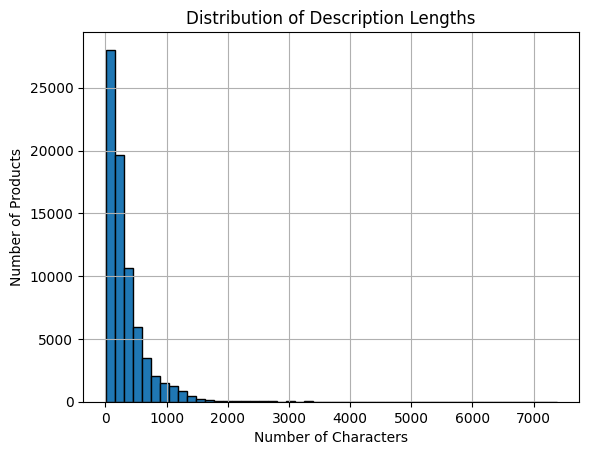

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df_all['length'], bins=50, edgecolor='black')
plt.title('Distribution of Description Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Number of Products')
plt.grid(True)
plt.show()


In [ ]:
# Define thresholds and assign recommended embedding model
def select_embedding(length):
    if length <= 256:
        return 'MiniLM (≤256)'
    elif length <= 512:
        return 'MPNet (257–512)'
    elif length <= 1024:
        return 'E5-Large (513–1024)'
    else:
        return 'Longformer (>1024)'

# Apply the function to your DataFrame
df_all['embedding_model'] = df_all['length'].apply(select_embedding)

# Count and calculate percentages
embedding_counts = df_all['embedding_model'].value_counts()
embedding_percentages = df_all['embedding_model'].value_counts(normalize=True) * 100

# Combine into a single DataFrame for display
embedding_summary = pd.DataFrame({
    'count': embedding_counts,
    'percentage': embedding_percentages.round(2)
})

# Display the summary
print(embedding_summary)


                     count  percentage
embedding_model                       
MiniLM (≤256)        42889       57.46
MPNet (257–512)      18461       24.73
E5-Large (513–1024)   9783       13.11
Longformer (>1024)    3507        4.70


In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=4775abdfc40d1c825ba6cecf4195ea21c350e4baedb10dbb4ca07c59d927bd30
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [ ]:
#language
# Install if not already installed
# pip install langdetect

from langdetect import detect, DetectorFactory
import pandas as pd

# Make language detection deterministic
DetectorFactory.seed = 0

# Define a function to detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'error'

# Apply to your DataFrame
df_all['language'] = df_all['text_clean'].apply(detect_language)

# Optional: view the distribution of languages
print(df_all['language'].value_counts())


In [ ]:
df_all[df_all['language']=='vi']

### Baselines

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix

# === Load labels (assumes y_train.npy and y_eval.npy exist) ===
y_train = np.load("y_train.npy")
y_eval = np.load("y_eval.npy")

# === Placeholder features (DummyClassifier ignores features) ===
X_train_placeholder = np.zeros((len(y_train), 1))
X_eval_placeholder = np.zeros((len(y_eval), 1))

strategies = ['most_frequent', 'uniform']
results = {}

for strategy in strategies:
    clf = DummyClassifier(strategy=strategy, random_state=42)
    clf.fit(X_train_placeholder, y_train)
    y_train_pred = clf.predict(X_train_placeholder)
    y_eval_pred = clf.predict(X_eval_placeholder)
    y_train_proba = clf.predict_proba(X_train_placeholder)
    y_eval_proba = clf.predict_proba(X_eval_placeholder)

    train_acc = accuracy_score(y_train, y_train_pred)
    eval_acc = accuracy_score(y_eval, y_eval_pred)
    train_loss = log_loss(y_train, y_train_proba)
    eval_loss = log_loss(y_eval, y_eval_proba)
    train_report = classification_report(y_train, y_train_pred, output_dict=True)
    eval_report = classification_report(y_eval, y_eval_pred, output_dict=True)
    conf = confusion_matrix(y_eval, y_eval_pred)

    results[strategy] = {
        'train_acc': train_acc,
        'eval_acc': eval_acc,
        'train_loss': train_loss,
        'eval_loss': eval_loss,
        'train_report': train_report,
        'eval_report': eval_report,
        'conf_matrix': conf
    }

    # === Print Metrics ===
    print(f"\n=== Strategy: {strategy} ===")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Train Log Loss: {train_loss:.4f}")
    print(f"Eval Accuracy: {eval_acc:.4f}")
    print(f"Eval Log Loss: {eval_loss:.4f}")
    print(f"Train Macro F1: {train_report['macro avg']['f1-score']:.4f}")
    print(f"Eval Macro F1: {eval_report['macro avg']['f1-score']:.4f}")

    # === Plot Confusion Matrix ===
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - Eval Set ({strategy.capitalize()} Baseline)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# === Compare Performance with Annotated Bar Charts ===
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Log Loss']
x = np.arange(len(metrics))
width = 0.35

for strategy in strategies:
    train_scores = [results[strategy]['train_acc'], results[strategy]['train_loss']]
    eval_scores = [results[strategy]['eval_acc'], results[strategy]['eval_loss']]

    plt.figure(figsize=(8, 5))
    bars1 = plt.bar(x - width/2, train_scores, width, label='Train')
    bars2 = plt.bar(x + width/2, eval_scores, width, label='Eval')

    # Add value labels above bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}",
                     ha='center', va='bottom', fontsize=9)

    plt.xticks(x, metrics)
    plt.ylabel("Score")
    plt.ylim(0, max(train_scores + eval_scores) + 0.1)
    plt.title(f"Train vs Eval Performance ({strategy.capitalize()} Baseline)")
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


### Benchmark Analysis: Embeddings Text

- note due to embeddings usage teh default parameters not coverenge comparable
- LogReg	sklearn	LogisticRegression(max_iter=1000, C=1.0)
- SVM	sklearn	SVC(kernel='linear', C=1.0, probability=True)
- XGBoost	xgboost	XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss')
- Neural Net	sklearn	MLPClassifier(hidden_layer_sizes=(128, 64), early_stopping=True, max_iter=300)

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, log_loss, classification_report, confusion_matrix
)

### Embedding Logistic Regression

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Skipped 1 bad rows from training data.
Skipped 1 bad rows from eval data.


Batches:   0%|          | 0/4551 [00:00<?, ?it/s]

Batches:   0%|          | 0/1138 [00:00<?, ?it/s]

Train matrix shape: (145603, 768)
Eval matrix shape: (36401, 768)

=== Train Set Metrics ===
Model: LogisticRegression
Accuracy: 0.8581
LogLoss: 0.4730
MacroF1: 0.8416
WeightedF1: 0.8570

=== Eval/Test Set Metrics ===
Model: LogisticRegression
Accuracy: 0.8548
LogLoss: 0.4852
MacroF1: 0.8418
WeightedF1: 0.8537


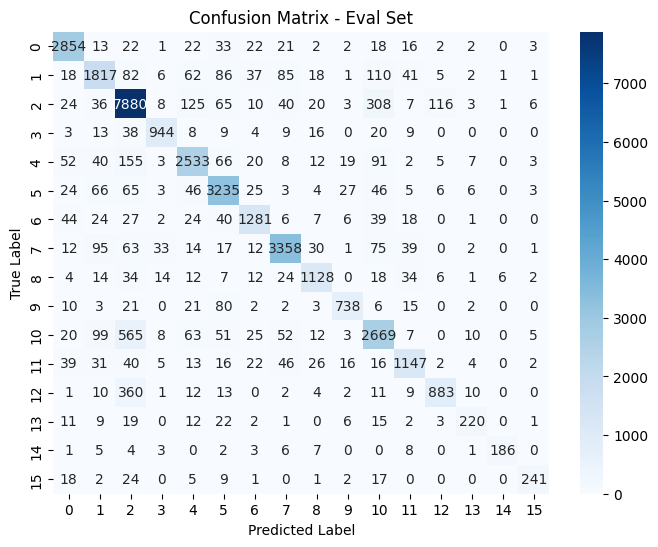

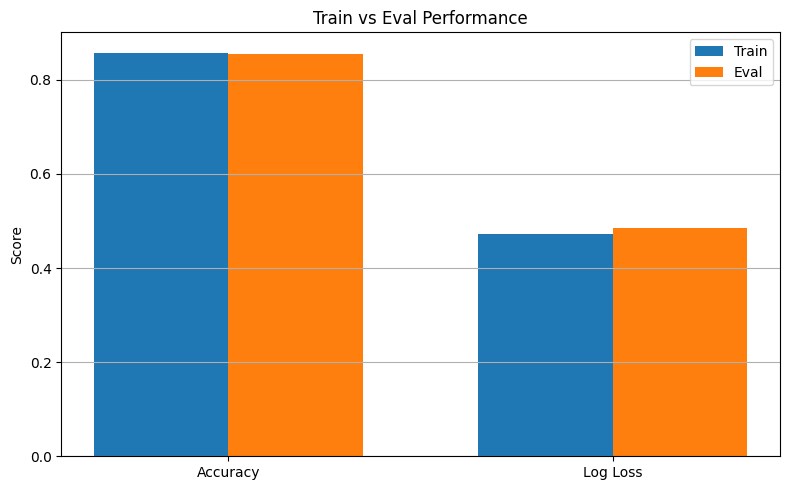

In [ ]:
# !pip install -q sentence-transformers

import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, log_loss, classification_report, confusion_matrix
)

# === Load sentence embedding model ===
model = SentenceTransformer('all-mpnet-base-v2')

# === Load training data ===
train_product_ids, train_texts, train_labels = [], [], []
skipped_train = 0
with open("train.csv", "r", encoding="utf-8") as f:
    reader = csv.DictReader(f)
    for row in reader:
        try:
            product_id = int(row["product_id"])
            label = int(row["label"])
            text = row["text_clean"]
            if not text.strip():
                skipped_train += 1
                continue
            train_product_ids.append(product_id)
            train_texts.append(text)
            train_labels.append(label)
        except (ValueError, TypeError, KeyError) as e:
            skipped_train += 1
            continue
print(f"Skipped {skipped_train} bad rows from training data.")

# === Load evaluation data ===
eval_product_ids, eval_texts, eval_labels = [], [], []
skipped_eval = 0
with open("test.csv", "r", encoding="utf-8") as f:
    reader = csv.DictReader(f)
    for row in reader:
        try:
            product_id = int(row["product_id"])
            label = int(row["label"])
            text = row["text_clean"]
            if not text.strip():
                skipped_eval += 1
                continue
            eval_product_ids.append(product_id)
            eval_texts.append(text)
            eval_labels.append(label)
        except (ValueError, TypeError, KeyError) as e:
            skipped_eval += 1
            continue
print(f"Skipped {skipped_eval} bad rows from eval data.")

# === Encode texts to embeddings ===
X_train = model.encode(train_texts, show_progress_bar=True)
X_eval = model.encode(eval_texts, show_progress_bar=True)

# === Save embeddings ===
np.save("X_train.npy", X_train)
np.save("X_eval.npy", X_eval)
np.save("y_train.npy", np.array(train_labels))
np.save("y_eval.npy", np.array(eval_labels))

print("Train matrix shape:", X_train.shape)
print("Eval matrix shape:", X_eval.shape)

# === Train model ===
clf = LogisticRegression(max_iter=1000, C=1.0, random_state=42)
clf.fit(X_train, train_labels)

# === Train Set Evaluation ===
y_train_pred = clf.predict(X_train)
y_train_proba = clf.predict_proba(X_train)
train_acc = accuracy_score(train_labels, y_train_pred)
train_loss = log_loss(train_labels, y_train_proba)
train_report = classification_report(train_labels, y_train_pred, output_dict=True)

logistic_eval_metrics_train = {
    "Model": "LogisticRegression",
    "Accuracy": train_acc,
    "LogLoss": train_loss,
    "MacroF1": train_report['macro avg']['f1-score'],
    "WeightedF1": train_report['weighted avg']['f1-score']
}

# === Eval/Test Set Evaluation ===
y_eval_pred = clf.predict(X_eval)
y_eval_proba = clf.predict_proba(X_eval)
eval_acc = accuracy_score(eval_labels, y_eval_pred)
eval_loss = log_loss(eval_labels, y_eval_proba)
eval_report = classification_report(eval_labels, y_eval_pred, output_dict=True)

logistic_eval_metrics_test = {
    "Model": "LogisticRegression",
    "Accuracy": eval_acc,
    "LogLoss": eval_loss,
    "MacroF1": eval_report['macro avg']['f1-score'],
    "WeightedF1": eval_report['weighted avg']['f1-score']
}

# === Print Metrics ===
print("\n=== Train Set Metrics ===")
for k, v in logistic_eval_metrics_train.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

print("\n=== Eval/Test Set Metrics ===")
for k, v in logistic_eval_metrics_test.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

# === Confusion Matrix (Eval) ===
conf = confusion_matrix(eval_labels, y_eval_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Eval Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# === Accuracy vs. Log Loss Plot ===
metrics = ['Accuracy', 'Log Loss']
train_scores = [logistic_eval_metrics_train['Accuracy'], logistic_eval_metrics_train['LogLoss']]
eval_scores = [logistic_eval_metrics_test['Accuracy'], logistic_eval_metrics_test['LogLoss']]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, train_scores, width, label='Train')
plt.bar(x + width/2, eval_scores, width, label='Eval')
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Train vs Eval Performance")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
import os
import json

# === Save metrics to folder ===
output_folder = "metrics_output"
os.makedirs(output_folder, exist_ok=True)

with open(os.path.join(output_folder, "logistic_eval_metrics_train.json"), "w", encoding="utf-8") as f_train:
    json.dump(logistic_eval_metrics_train, f_train, indent=4)

with open(os.path.join(output_folder, "logistic_eval_metrics_test.json"), "w", encoding="utf-8") as f_test:
    json.dump(logistic_eval_metrics_test, f_test, indent=4)

print(f"Metrics saved to folder: {output_folder}")


Metrics saved to folder: metrics_output


In [ ]:
logistic_eval_metrics_train  # metrics on training set


{'Model': 'LogisticRegression',
 'Accuracy': 0.8584369827544762,
 'LogLoss': 0.47227338459873275,
 'MacroF1': 0.8420943190567856,
 'WeightedF1': 0.8573593215358393}

In [ ]:
logistic_eval_metrics_test   # metrics on eval/test set


{'Model': 'LogisticRegression',
 'Accuracy': 0.8546193785885003,
 'LogLoss': 0.4846220249694018,
 'MacroF1': 0.8418281678221102,
 'WeightedF1': 0.8535136481835969}

### Embeddings SVM Leniar

Train matrix shape: (145603, 768)
Eval matrix shape: (36401, 768)

=== Train Set Metrics ===
Model: CalibratedLinearSVC
Accuracy: 0.8695
LogLoss: 0.4619
MacroF1: 0.8607
WeightedF1: 0.8685

=== Eval/Test Set Metrics ===
Model: CalibratedLinearSVC
Accuracy: 0.8639
LogLoss: 0.4840
MacroF1: 0.8562
WeightedF1: 0.8629


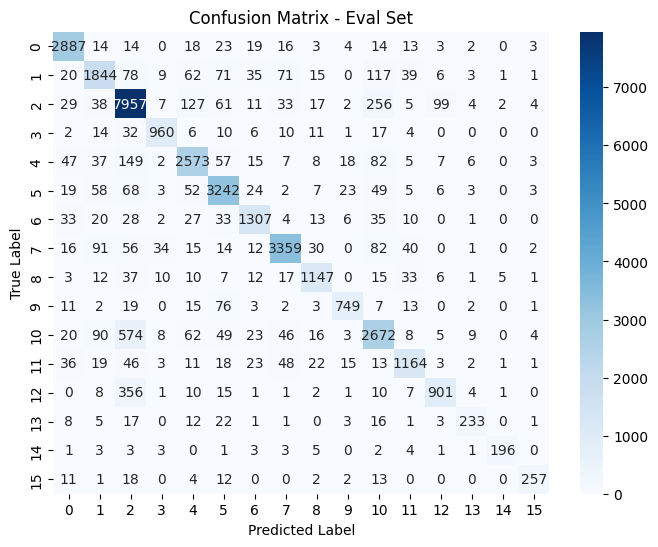

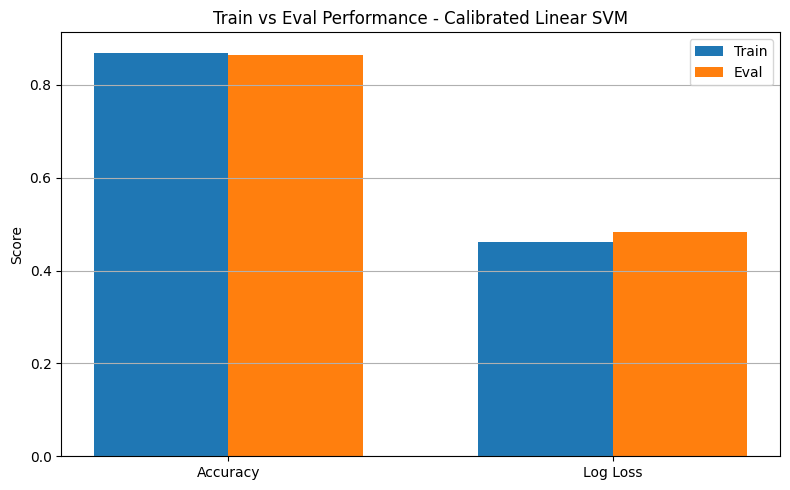

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    accuracy_score, log_loss, classification_report, confusion_matrix
)

# === Load saved embeddings ===
X_train = np.load("X_train.npy")
X_eval = np.load("X_eval.npy")
y_train = np.load("y_train.npy")
y_eval = np.load("y_eval.npy")

print("Train matrix shape:", X_train.shape)
print("Eval matrix shape:", X_eval.shape)

# === Train SVM model with calibration ===
base_svm = LinearSVC(max_iter=1000)
clf = CalibratedClassifierCV(base_svm, cv=3)  # Gives probability output
clf.fit(X_train, y_train)

# === Train Set Evaluation ===
y_train_pred = clf.predict(X_train)
y_train_proba = clf.predict_proba(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
train_loss = log_loss(y_train, y_train_proba)
train_report = classification_report(y_train, y_train_pred, output_dict=True)

svm_eval_metrics_train = {
    "Model": "CalibratedLinearSVC",
    "Accuracy": train_acc,
    "LogLoss": train_loss,
    "MacroF1": train_report['macro avg']['f1-score'],
    "WeightedF1": train_report['weighted avg']['f1-score']
}

# === Eval/Test Set Evaluation ===
y_eval_pred = clf.predict(X_eval)
y_eval_proba = clf.predict_proba(X_eval)
eval_acc = accuracy_score(y_eval, y_eval_pred)
eval_loss = log_loss(y_eval, y_eval_proba)
eval_report = classification_report(y_eval, y_eval_pred, output_dict=True)

svm_eval_metrics_test = {
    "Model": "CalibratedLinearSVC",
    "Accuracy": eval_acc,
    "LogLoss": eval_loss,
    "MacroF1": eval_report['macro avg']['f1-score'],
    "WeightedF1": eval_report['weighted avg']['f1-score']
}

# === Print Metrics ===
print("\n=== Train Set Metrics ===")
for k, v in svm_eval_metrics_train.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

print("\n=== Eval/Test Set Metrics ===")
for k, v in svm_eval_metrics_test.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

# === Confusion Matrix (Eval) ===
conf = confusion_matrix(y_eval, y_eval_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Eval Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# === Accuracy vs. Log Loss Plot ===
metrics = ['Accuracy', 'Log Loss']
train_scores = [svm_eval_metrics_train['Accuracy'], svm_eval_metrics_train['LogLoss']]
eval_scores = [svm_eval_metrics_test['Accuracy'], svm_eval_metrics_test['LogLoss']]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, train_scores, width, label='Train')
plt.bar(x + width/2, eval_scores, width, label='Eval')
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Train vs Eval Performance - Calibrated Linear SVM")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
import os
import json

# === Save SVM metrics to folder ===
output_folder = "metrics_output"
os.makedirs(output_folder, exist_ok=True)

with open(os.path.join(output_folder, "svm_eval_metrics_train.json"), "w", encoding="utf-8") as f_train:
    json.dump(svm_eval_metrics_train, f_train, indent=4)

with open(os.path.join(output_folder, "svm_eval_metrics_test.json"), "w", encoding="utf-8") as f_test:
    json.dump(svm_eval_metrics_test, f_test, indent=4)

print(f"Metrics saved to folder: {output_folder}")


Metrics saved to folder: metrics_output


- not leverage GPU not other options support loss

### Embeddings X-Boost

CUDA available: True
Using GPU: Tesla T4
Train matrix shape: (145603, 768)
Eval matrix shape: (36401, 768)
[0]	validation-mlogloss:2.51786
[1]	validation-mlogloss:2.34276
[2]	validation-mlogloss:2.20317
[3]	validation-mlogloss:2.08581
[4]	validation-mlogloss:1.98742
[5]	validation-mlogloss:1.89988
[6]	validation-mlogloss:1.82280
[7]	validation-mlogloss:1.75528
[8]	validation-mlogloss:1.69386
[9]	validation-mlogloss:1.63756
[10]	validation-mlogloss:1.58585
[11]	validation-mlogloss:1.53862
[12]	validation-mlogloss:1.49563
[13]	validation-mlogloss:1.45471
[14]	validation-mlogloss:1.41691
[15]	validation-mlogloss:1.38179
[16]	validation-mlogloss:1.34871
[17]	validation-mlogloss:1.31826
[18]	validation-mlogloss:1.28934
[19]	validation-mlogloss:1.26229
[20]	validation-mlogloss:1.23759
[21]	validation-mlogloss:1.21370
[22]	validation-mlogloss:1.19102
[23]	validation-mlogloss:1.16970
[24]	validation-mlogloss:1.14975
[25]	validation-mlogloss:1.13091
[26]	validation-mlogloss:1.11293
[27]	validat

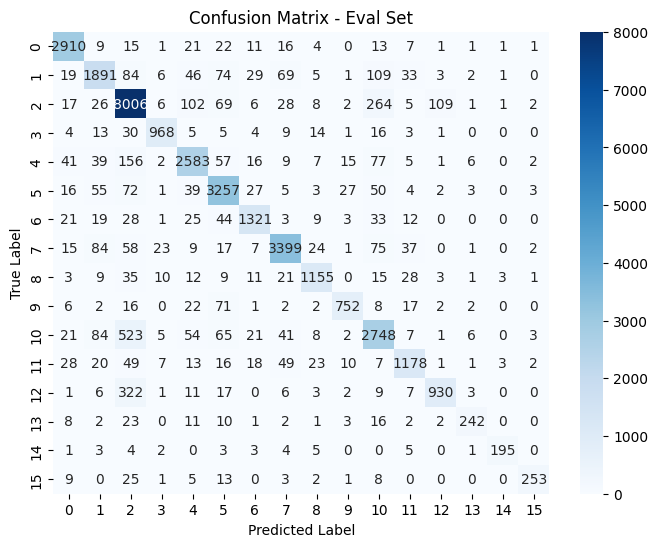

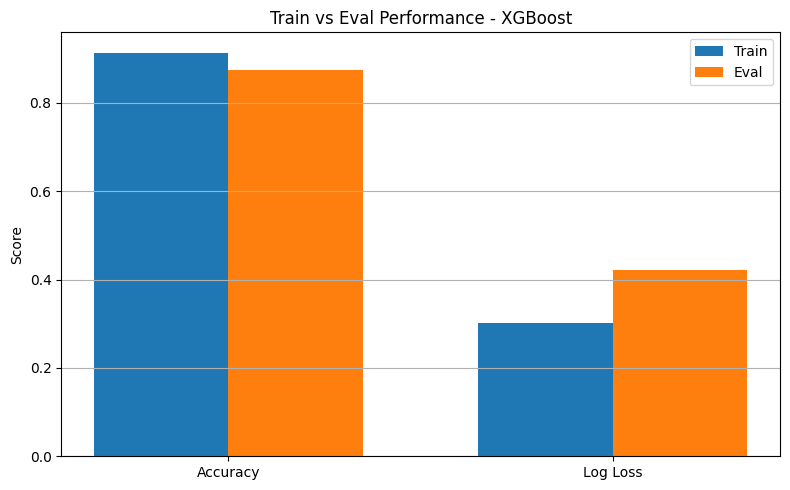

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import xgboost as xgb
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# === Check GPU ===
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    print("Running on CPU")

# === Load precomputed data ===
X_train = np.load("X_train.npy")
X_eval = np.load("X_eval.npy")
y_train = np.load("y_train.npy")
y_eval = np.load("y_eval.npy")

print("Train matrix shape:", X_train.shape)
print("Eval matrix shape:", X_eval.shape)

# === 80/20 train/val split for early stopping ===
X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# === Convert to DMatrix ===
dtrain = xgb.DMatrix(X_train_sub, label=y_train_sub)
dval = xgb.DMatrix(X_val_sub, label=y_val_sub)
dfull_train = xgb.DMatrix(X_train, label=y_train)
dfull_eval = xgb.DMatrix(X_eval, label=y_eval)

# === XGBoost Parameters ===
xgb_params = {
    "objective": "multi:softprob",
    "num_class": len(np.unique(y_train)),
    "tree_method": "hist",
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "eval_metric": "mlogloss",
    "learning_rate": 0.1,
    "max_depth": 3,
    "subsample": 0.7,
    "colsample_bytree": 0.7,
    "lambda": 3.0
}

# === Train with early stopping ===
model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=500,
    evals=[(dval, "validation")],
    early_stopping_rounds=20,
    verbose_eval=True
)

# === Predict ===
train_preds = model.predict(dfull_train)
eval_preds = model.predict(dfull_eval)
y_train_pred = np.argmax(train_preds, axis=1)
y_eval_pred = np.argmax(eval_preds, axis=1)

# === Metrics ===
train_acc = accuracy_score(y_train, y_train_pred)
train_loss = log_loss(y_train, train_preds)
train_report = classification_report(y_train, y_train_pred, output_dict=True)

eval_acc = accuracy_score(y_eval, y_eval_pred)
eval_loss = log_loss(y_eval, eval_preds)
eval_report = classification_report(y_eval, y_eval_pred, output_dict=True)

# === Save metrics like SVM style ===
xgb_eval_metrics_train = {
    "Model": "XGBoost",
    "Accuracy": train_acc,
    "LogLoss": train_loss,
    "MacroF1": train_report['macro avg']['f1-score'],
    "WeightedF1": train_report['weighted avg']['f1-score']
}

xgb_eval_metrics_test = {
    "Model": "XGBoost",
    "Accuracy": eval_acc,
    "LogLoss": eval_loss,
    "MacroF1": eval_report['macro avg']['f1-score'],
    "WeightedF1": eval_report['weighted avg']['f1-score']
}

# === Print metrics ===
print("\n=== Train Set Metrics ===")
for k, v in xgb_eval_metrics_train.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

print("\n=== Eval/Test Set Metrics ===")
for k, v in xgb_eval_metrics_test.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

# === Confusion Matrix ===
conf = confusion_matrix(y_eval, y_eval_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Eval Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# === Accuracy vs Log Loss Plot ===
metrics = ['Accuracy', 'Log Loss']
train_scores = [xgb_eval_metrics_train['Accuracy'], xgb_eval_metrics_train['LogLoss']]
eval_scores = [xgb_eval_metrics_test['Accuracy'], xgb_eval_metrics_test['LogLoss']]
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, train_scores, width, label='Train')
plt.bar(x + width/2, eval_scores, width, label='Eval')
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Train vs Eval Performance - XGBoost")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
with open(os.path.join(output_folder, "xgb_eval_metrics_train.json"), "w", encoding="utf-8") as f_train:
    json.dump(xgb_eval_metrics_train, f_train, indent=4)

with open(os.path.join(output_folder, "xgb_eval_metrics_test.json"), "w", encoding="utf-8") as f_test:
    json.dump(xgb_eval_metrics_test, f_test, indent=4)

print(f"Metrics saved to folder: {output_folder}")

Metrics saved to folder: metrics_output


### Neural Network

Epoch 1, Val Loss: 0.6160
Epoch 2, Val Loss: 0.5342
Epoch 3, Val Loss: 0.4976
Epoch 4, Val Loss: 0.4719
Epoch 5, Val Loss: 0.4519
Epoch 6, Val Loss: 0.4402
Epoch 7, Val Loss: 0.4259
Epoch 8, Val Loss: 0.4213
Epoch 9, Val Loss: 0.4107
Epoch 10, Val Loss: 0.4042
Epoch 11, Val Loss: 0.3996
Epoch 12, Val Loss: 0.3944
Epoch 13, Val Loss: 0.3904
Epoch 14, Val Loss: 0.3909
Epoch 15, Val Loss: 0.3857
Epoch 16, Val Loss: 0.3858
Epoch 17, Val Loss: 0.3836
Epoch 18, Val Loss: 0.3856
Epoch 19, Val Loss: 0.3834
Epoch 20, Val Loss: 0.3792
Epoch 21, Val Loss: 0.3790
Epoch 22, Val Loss: 0.3795
Epoch 23, Val Loss: 0.3775
Epoch 24, Val Loss: 0.3797
Epoch 25, Val Loss: 0.3802
Epoch 26, Val Loss: 0.3803
Epoch 27, Val Loss: 0.3751
Epoch 28, Val Loss: 0.3815
Epoch 29, Val Loss: 0.3800
Epoch 30, Val Loss: 0.3804
Epoch 31, Val Loss: 0.3782
Epoch 32, Val Loss: 0.3786
Epoch 33, Val Loss: 0.3795
Epoch 34, Val Loss: 0.3819
Epoch 35, Val Loss: 0.3833
Epoch 36, Val Loss: 0.3797
Epoch 37, Val Loss: 0.3857
Epoch 38, 

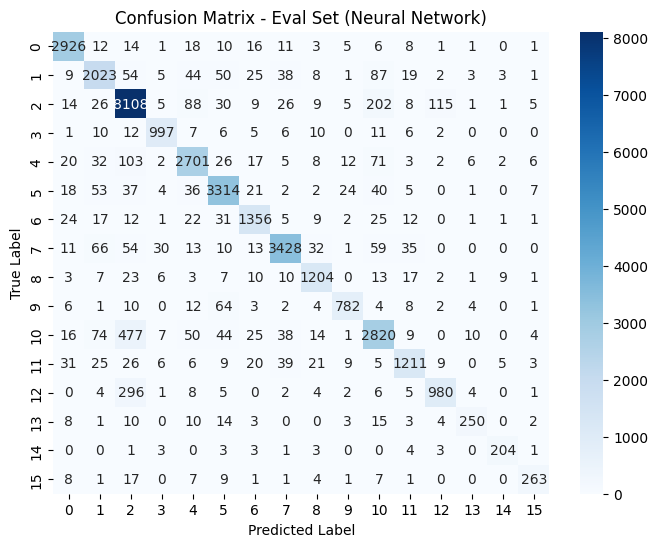

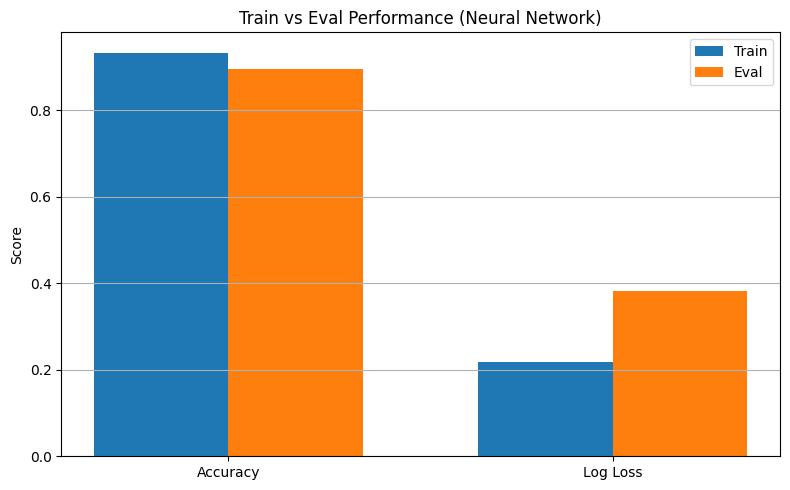


=== Train Set Metrics (Neural Network) ===
Model: NeuralNetwork
Accuracy: 0.9333
LogLoss: 0.2189
MacroF1: 0.9269
WeightedF1: 0.9329

=== Eval/Test Set Metrics (Neural Network) ===
Model: NeuralNetwork
Accuracy: 0.8947
LogLoss: 0.3819
MacroF1: 0.8847
WeightedF1: 0.8940


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, accuracy_score, log_loss, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === Convert to Torch Tensors ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_eval_tensor = torch.tensor(X_eval, dtype=torch.float32)
y_eval_tensor = torch.tensor(y_eval, dtype=torch.long)

# 80/20 validation split (same as XGBoost)
from sklearn.model_selection import train_test_split
X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(
    X_train_tensor, y_train_tensor, test_size=0.2, random_state=42
)

# Dataloaders
batch_size = 128
train_dataset = TensorDataset(X_train_sub, y_train_sub)
val_dataset = TensorDataset(X_val_sub, y_val_sub)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# === Simple MLP Model ===
class SimpleNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.model(x)

model = SimpleNN(X_train.shape[1], len(np.unique(y_train))).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# === Training with Early Stopping ===
patience = 20
best_loss = float('inf')
patience_counter = 0
num_epochs = 500

for epoch in range(num_epochs):
    model.train()
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        preds = model(xb)
        loss = criterion(preds, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # === Evaluate on validation set ===
    model.eval()
    val_losses = []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb)
            loss = criterion(preds, yb)
            val_losses.append(loss.item())
    val_loss = np.mean(val_losses)

    print(f"Epoch {epoch+1}, Val Loss: {val_loss:.4f}")

    # Early stopping
    if val_loss < best_loss:
        best_loss = val_loss
        best_model_state = model.state_dict()
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping.")
            break

# === Load best model ===
model.load_state_dict(best_model_state)

# === Evaluation ===
model.eval()
with torch.no_grad():
    train_logits = model(X_train_tensor.to(device)).cpu().numpy()
    eval_logits = model(X_eval_tensor.to(device)).cpu().numpy()

train_probs = torch.softmax(torch.tensor(train_logits), dim=1).numpy()
eval_probs = torch.softmax(torch.tensor(eval_logits), dim=1).numpy()
y_train_pred = np.argmax(train_probs, axis=1)
y_eval_pred = np.argmax(eval_probs, axis=1)

# === Metrics ===
train_acc = accuracy_score(y_train, y_train_pred)
train_loss = log_loss(y_train, train_probs)
train_report = classification_report(y_train, y_train_pred, output_dict=True)
eval_acc = accuracy_score(y_eval, y_eval_pred)
eval_loss = log_loss(y_eval, eval_probs)
eval_report = classification_report(y_eval, y_eval_pred, output_dict=True)

print("\n=== Train Metrics ===")
print(f"Accuracy: {train_acc:.4f}")
print(f"LogLoss: {train_loss:.4f}")
print(f"MacroF1: {train_report['macro avg']['f1-score']:.4f}")
print(f"WeightedF1: {train_report['weighted avg']['f1-score']:.4f}")
print("\n=== Eval Metrics ===")
print(f"Accuracy: {eval_acc:.4f}")
print(f"LogLoss: {eval_loss:.4f}")
print(f"MacroF1: {eval_report['macro avg']['f1-score']:.4f}")
print(f"WeightedF1: {eval_report['weighted avg']['f1-score']:.4f}")

# === Confusion Matrix ===
conf = confusion_matrix(y_eval, y_eval_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Eval Set (Neural Network)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# === Accuracy vs Log Loss Plot ===
metrics = ['Accuracy', 'Log Loss']
train_scores = [train_acc, train_loss]
eval_scores = [eval_acc, eval_loss]
x = np.arange(len(metrics))
width = 0.35
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, train_scores, width, label='Train')
plt.bar(x + width/2, eval_scores, width, label='Eval')
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Train vs Eval Performance (Neural Network)")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# === Save metrics like SVM/XGBoost style ===
nn_eval_metrics_train = {
    "Model": "NeuralNetwork",
    "Accuracy": train_acc,
    "LogLoss": train_loss,
    "MacroF1": train_report['macro avg']['f1-score'],
    "WeightedF1": train_report['weighted avg']['f1-score']
}

nn_eval_metrics_test = {
    "Model": "NeuralNetwork",
    "Accuracy": eval_acc,
    "LogLoss": eval_loss,
    "MacroF1": eval_report['macro avg']['f1-score'],
    "WeightedF1": eval_report['weighted avg']['f1-score']
}

# === Print metrics ===
print("\n=== Train Set Metrics (Neural Network) ===")
for k, v in nn_eval_metrics_train.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

print("\n=== Eval/Test Set Metrics (Neural Network) ===")
for k, v in nn_eval_metrics_test.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")


In [ ]:
with open(os.path.join(output_folder, "nn_eval_metrics_train.json"), "w", encoding="utf-8") as f_train:
    json.dump(nn_eval_metrics_train, f_train, indent=4)

with open(os.path.join(output_folder, "nn_eval_metrics_test.json"), "w", encoding="utf-8") as f_test:
    json.dump(nn_eval_metrics_test, f_test, indent=4)

print(f"Metrics saved to folder: {output_folder}")

Metrics saved to folder: metrics_output


### Essemble Voting

Train matrix shape: (145603, 768)
Eval matrix shape: (36401, 768)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



=== Train Metrics ===
Accuracy: 0.8552
Log Loss: 0.5154
Macro F1: 0.8389
Weighted F1: 0.8536

=== Eval Metrics ===
Accuracy: 0.8502
Log Loss: 0.5343
Macro F1: 0.8343
Weighted F1: 0.8486


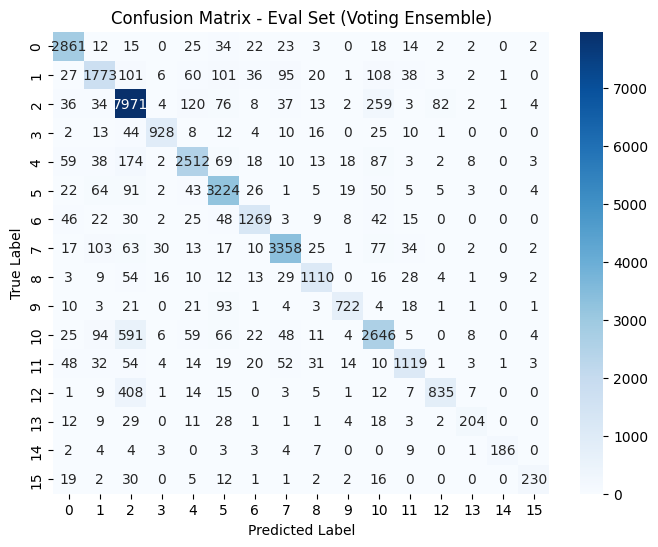

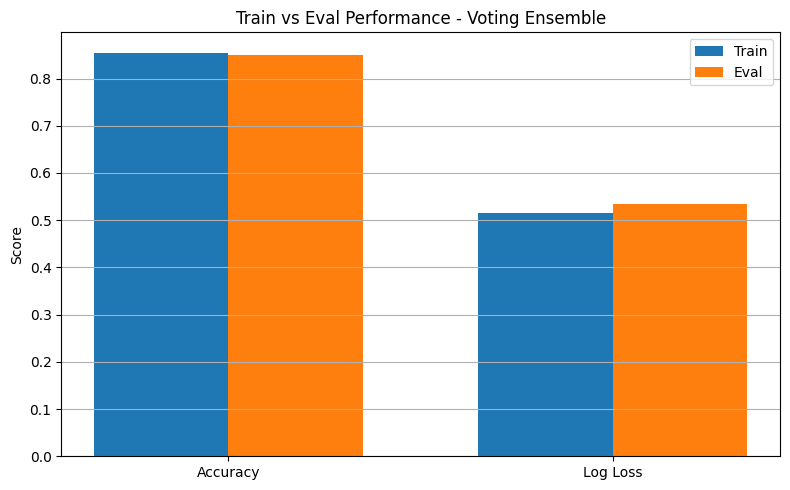

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
from xgboost import XGBClassifier

# === Load precomputed sentence embeddings and labels ===
X_train = np.load("X_train.npy")
X_eval = np.load("X_eval.npy")
y_train = np.load("y_train.npy")
y_eval = np.load("y_eval.npy")

print("Train matrix shape:", X_train.shape)
print("Eval matrix shape:", X_eval.shape)

# === Define base classifiers ===
xgb_clf = XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(y_train)),
    eval_metric='mlogloss',
    use_label_encoder=False,
    tree_method='hist',
    device='cpu',
    learning_rate=0.1,
    max_depth=3,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_lambda=3.0
)

logreg_clf = LogisticRegression(
    max_iter=1000,
    C=1.0,
    multi_class='multinomial',
    solver='lbfgs'
)

# === Build Voting Ensemble (Soft Voting ensures probabilities) ===
ensemble = VotingClassifier(
    estimators=[
        ('xgb', xgb_clf),
        ('logreg', logreg_clf)
    ],
    voting='soft',
    n_jobs=-1
)

# === Fit the ensemble ===
ensemble.fit(X_train, y_train)

# === Predict Probabilities and Labels ===
y_train_proba = ensemble.predict_proba(X_train)
y_eval_proba = ensemble.predict_proba(X_eval)
y_train_pred = np.argmax(y_train_proba, axis=1)
y_eval_pred = np.argmax(y_eval_proba, axis=1)

# === Metrics (Cross-Entropy / Log Loss is the official one) ===
train_acc = accuracy_score(y_train, y_train_pred)
train_loss = log_loss(y_train, y_train_proba)
train_report = classification_report(y_train, y_train_pred, output_dict=True)

eval_acc = accuracy_score(y_eval, y_eval_pred)
eval_loss = log_loss(y_eval, y_eval_proba)
eval_report = classification_report(y_eval, y_eval_pred, output_dict=True)

# === Output in required format ===
print("\n=== Train Metrics ===")
print(f"Accuracy: {train_acc:.4f}")
print(f"Log Loss: {train_loss:.4f}")
print(f"Macro F1: {train_report['macro avg']['f1-score']:.4f}")
print(f"Weighted F1: {train_report['weighted avg']['f1-score']:.4f}")

print("\n=== Eval Metrics ===")
print(f"Accuracy: {eval_acc:.4f}")
print(f"Log Loss: {eval_loss:.4f}")
print(f"Macro F1: {eval_report['macro avg']['f1-score']:.4f}")
print(f"Weighted F1: {eval_report['weighted avg']['f1-score']:.4f}")

# === Confusion Matrix ===
conf = confusion_matrix(y_eval, y_eval_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Eval Set (Voting Ensemble)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# === Accuracy vs Log Loss Plot ===
metrics = ['Accuracy', 'Log Loss']
train_scores = [train_acc, train_loss]
eval_scores = [eval_acc, eval_loss]
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, train_scores, width, label='Train')
plt.bar(x + width/2, eval_scores, width, label='Eval')
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Train vs Eval Performance - Voting Ensemble")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# === Save metrics like SVM/XGBoost style ===
ensemble_metrics_train = {
    "Model": "VotingEnsemble",
    "Accuracy": train_acc,
    "LogLoss": train_loss,
    "MacroF1": train_report['macro avg']['f1-score'],
    "WeightedF1": train_report['weighted avg']['f1-score']
}

ensemble_metrics_test = {
    "Model": "VotingEnsemble",
    "Accuracy": eval_acc,
    "LogLoss": eval_loss,
    "MacroF1": eval_report['macro avg']['f1-score'],
    "WeightedF1": eval_report['weighted avg']['f1-score']
}

# Optional: print or save
print("\n=== Ensemble Metrics Dictionary Format ===")
print("Train:", ensemble_metrics_train)
print("Test:", ensemble_metrics_test)


=== Ensemble Metrics Dictionary Format ===
Train: {'Model': 'VotingEnsemble', 'Accuracy': 0.8551540833636669, 'LogLoss': 0.515363317535141, 'MacroF1': 0.8389248165339578, 'WeightedF1': 0.8536368255683084}
Test: {'Model': 'VotingEnsemble', 'Accuracy': 0.8501964231751875, 'LogLoss': 0.5342687072457389, 'MacroF1': 0.8342895510472721, 'WeightedF1': 0.84857147782458}


In [ ]:
with open(os.path.join(output_folder, "ensemble_eval_metrics_train.json"), "w", encoding="utf-8") as f_train:
    json.dump(ensemble_metrics_train, f_train, indent=4)

with open(os.path.join(output_folder, "ensemble_eval_metrics_test.json"), "w", encoding="utf-8") as f_test:
    json.dump(ensemble_metrics_test, f_test, indent=4)


### Essemble Stacking

### Comparison Plots

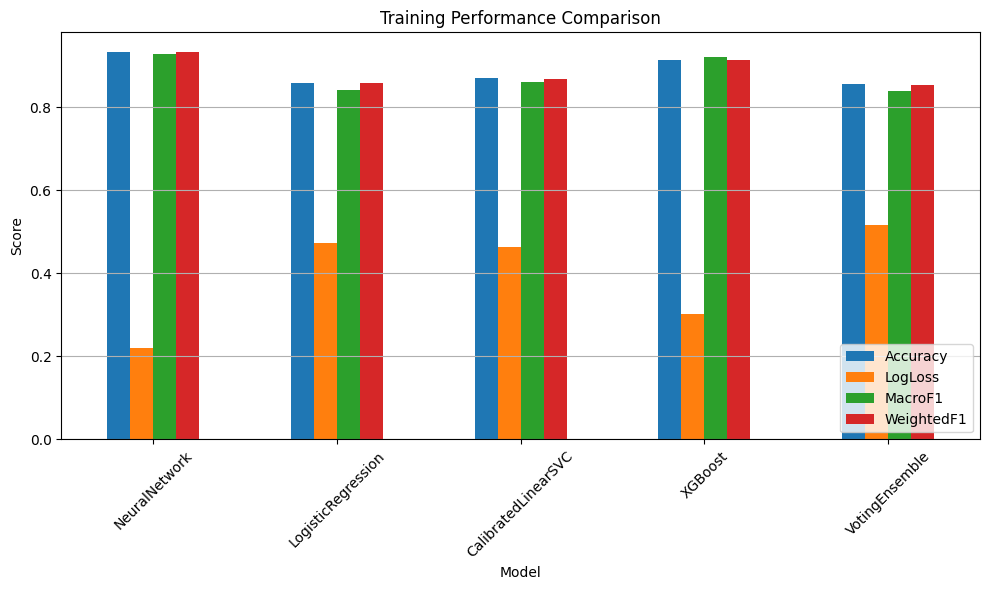

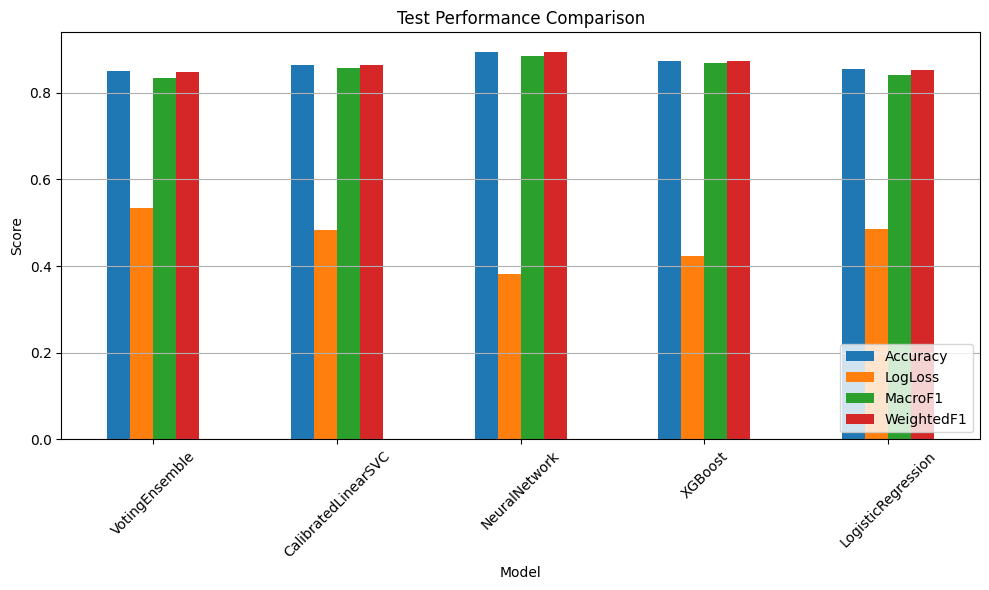

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load all metrics from saved JSON files ===
metrics_dir = "metrics_output"

train_metrics = []
test_metrics = []

for filename in os.listdir(metrics_dir):
    filepath = os.path.join(metrics_dir, filename)
    if filename.endswith("_train.json"):
        with open(filepath, "r", encoding="utf-8") as f:
            data = json.load(f)
            train_metrics.append(data)
    elif filename.endswith("_test.json"):
        with open(filepath, "r", encoding="utf-8") as f:
            data = json.load(f)
            test_metrics.append(data)

df_train = pd.DataFrame(train_metrics).set_index("Model")
df_test = pd.DataFrame(test_metrics).set_index("Model")

# Drop LogLoss for now if scales clash; or normalize later
metrics_to_plot = ["Accuracy", "LogLoss", "MacroF1", "WeightedF1"]

def plot_metrics(df, title):
    ax = df[metrics_to_plot].plot(kind="bar", figsize=(10, 6))
    plt.title(title)
    plt.ylabel("Score")
    plt.ylim(0, 1 if "LogLoss" not in metrics_to_plot else None)
    plt.xticks(rotation=45)
    plt.legend(loc='lower right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

plot_metrics(df_train, "Training Performance Comparison")
plot_metrics(df_test, "Test Performance Comparison")

### Tune The Best 2 Models

Epoch 1, Val Loss: 0.5143
Epoch 2, Val Loss: 0.4686
Epoch 3, Val Loss: 0.4493
Epoch 4, Val Loss: 0.4499
Epoch 5, Val Loss: 0.4179
Epoch 6, Val Loss: 0.4087
Epoch 7, Val Loss: 0.4107
Epoch 8, Val Loss: 0.4032
Epoch 9, Val Loss: 0.3902
Epoch 10, Val Loss: 0.3862
Epoch 11, Val Loss: 0.3846
Epoch 12, Val Loss: 0.3811
Epoch 13, Val Loss: 0.3815
Epoch 14, Val Loss: 0.3748
Epoch 15, Val Loss: 0.3743
Epoch 16, Val Loss: 0.3772
Epoch 17, Val Loss: 0.3747
Epoch 18, Val Loss: 0.3682
Epoch 19, Val Loss: 0.3670
Epoch 20, Val Loss: 0.3670
Epoch 21, Val Loss: 0.3676
Epoch 22, Val Loss: 0.3596
Epoch 23, Val Loss: 0.3663
Epoch 24, Val Loss: 0.3690
Epoch 25, Val Loss: 0.3589
Epoch 26, Val Loss: 0.3601
Epoch 27, Val Loss: 0.3628
Epoch 28, Val Loss: 0.3605
Epoch 29, Val Loss: 0.3612
Epoch 30, Val Loss: 0.3571
Epoch 31, Val Loss: 0.3522
Epoch 32, Val Loss: 0.3531
Epoch 33, Val Loss: 0.3606
Epoch 34, Val Loss: 0.3565
Epoch 35, Val Loss: 0.3559
Epoch 36, Val Loss: 0.3519
Epoch 37, Val Loss: 0.3509
Epoch 38, 

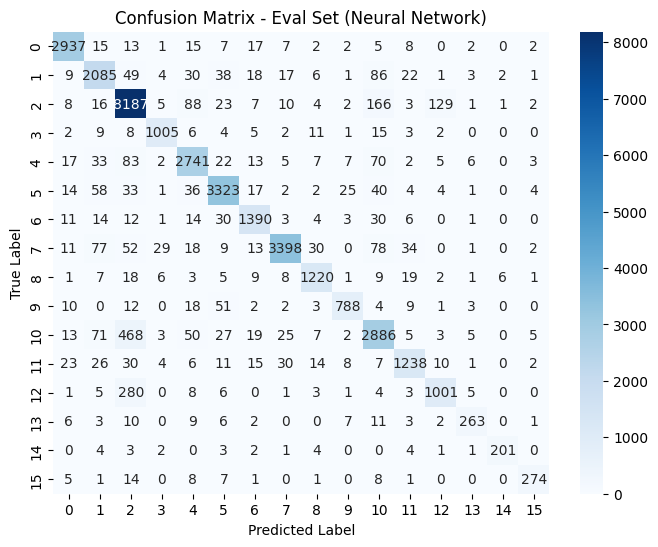

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_eval_tensor = torch.tensor(X_eval, dtype=torch.float32)
y_eval_tensor = torch.tensor(y_eval, dtype=torch.long)

# Train/val split
X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(
    X_train_tensor, y_train_tensor, test_size=0.2, random_state=42
)

# Dataloaders
batch_size = 128
train_dataset = TensorDataset(X_train_sub, y_train_sub)
val_dataset = TensorDataset(X_val_sub, y_val_sub)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Model
class ImprovedNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(ImprovedNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.model(x)

model = ImprovedNN(X_train.shape[1], len(np.unique(y_train))).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

# Training
patience = 20
best_loss = float('inf')
patience_counter = 0
num_epochs = 500

for epoch in range(num_epochs):
    model.train()
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        xb = xb + torch.randn_like(xb) * 0.01  # noise injection
        preds = model(xb)
        loss = criterion(preds, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    val_losses = []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb)
            val_losses.append(criterion(preds, yb).item())
    val_loss = np.mean(val_losses)
    scheduler.step(val_loss)
    print(f"Epoch {epoch+1}, Val Loss: {val_loss:.4f}")

    if val_loss < best_loss:
        best_loss = val_loss
        best_model_state = model.state_dict()
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping.")
            break

# Load best model
model.load_state_dict(best_model_state)

# Evaluation
model.eval()
with torch.no_grad():
    train_logits = model(X_train_tensor.to(device)).cpu().numpy()
    eval_logits = model(X_eval_tensor.to(device)).cpu().numpy()

train_probs = torch.softmax(torch.tensor(train_logits), dim=1).numpy()
eval_probs = torch.softmax(torch.tensor(eval_logits), dim=1).numpy()
y_train_pred = np.argmax(train_probs, axis=1)
y_eval_pred = np.argmax(eval_probs, axis=1)

# Metrics
train_acc = accuracy_score(y_train, y_train_pred)
train_loss = log_loss(y_train, train_probs)
train_report = classification_report(y_train, y_train_pred, output_dict=True)
eval_acc = accuracy_score(y_eval, y_eval_pred)
eval_loss = log_loss(y_eval, eval_probs)
eval_report = classification_report(y_eval, y_eval_pred, output_dict=True)

# Print metrics
print("\n=== Train Metrics ===")
print(f"Accuracy: {train_acc:.4f}")
print(f"LogLoss: {train_loss:.4f}")
print(f"MacroF1: {train_report['macro avg']['f1-score']:.4f}")
print(f"WeightedF1: {train_report['weighted avg']['f1-score']:.4f}")
print("\n=== Eval Metrics ===")
print(f"Accuracy: {eval_acc:.4f}")
print(f"LogLoss: {eval_loss:.4f}")
print(f"MacroF1: {eval_report['macro avg']['f1-score']:.4f}")
print(f"WeightedF1: {eval_report['weighted avg']['f1-score']:.4f}")

# Confusion matrix
conf = confusion_matrix(y_eval, y_eval_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Eval Set (Neural Network)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 22.4 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, classification_report
import numpy as np
import optuna

# Convert to Torch Tensors
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_eval_tensor = torch.tensor(X_eval, dtype=torch.float32)
y_eval_tensor = torch.tensor(y_eval, dtype=torch.long)

# Train/Validation split
X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(
    X_train_tensor, y_train_tensor, test_size=0.2, random_state=42
)

train_dataset = TensorDataset(X_train_sub, y_train_sub)
val_dataset = TensorDataset(X_val_sub, y_val_sub)

# Define model class
class TunableNN(nn.Module):
    def __init__(self, input_dim, num_classes, hidden1, hidden2, dropout):
        super(TunableNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden1),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden1, hidden2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden2, num_classes)
        )

    def forward(self, x):
        return self.model(x)

# Define objective function
def objective(trial):
    # Hyperparameters to optimize
    hidden1 = trial.suggest_int("hidden1", 64, 256)
    hidden2 = trial.suggest_int("hidden2", 32, 128)
    dropout = trial.suggest_float("dropout", 0.2, 0.5)
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-3, log=True)
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "AdamW", "RMSprop"])
    batch_size = trial.suggest_categorical("batch_size", [64, 128, 256])

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    model = TunableNN(X_train.shape[1], len(np.unique(y_train)), hidden1, hidden2, dropout).to(device)
    criterion = nn.CrossEntropyLoss()

    if optimizer_name == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    elif optimizer_name == "AdamW":
        optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    else:
        optimizer = optim.RMSprop(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Training with early stopping
    best_loss = float('inf')
    patience = 10
    patience_counter = 0
    num_epochs = 100

    for epoch in range(num_epochs):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb)
            loss = criterion(preds, yb)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Validation
        model.eval()
        val_losses = []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                preds = model(xb)
                loss = criterion(preds, yb)
                val_losses.append(loss.item())
        val_loss = np.mean(val_losses)

        trial.report(val_loss, epoch)

        if val_loss < best_loss:
            best_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                break

        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return best_loss

# Run Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

# Best hyperparameters
print("Best trial:")
print(study.best_trial)
print("Best hyperparameters:")
for key, val in study.best_trial.params.items():
    print(f"{key}: {val}")


[I 2025-05-06 08:08:44,598] A new study created in memory with name: no-name-01faf168-8eb4-41b4-97dc-801751305342
[I 2025-05-06 08:12:32,914] Trial 0 finished with value: 0.388667745558594 and parameters: {'hidden1': 114, 'hidden2': 57, 'dropout': 0.36952265065088996, 'lr': 0.0007616492695695264, 'weight_decay': 1.191850857042978e-05, 'optimizer': 'AdamW', 'batch_size': 64}. Best is trial 0 with value: 0.388667745558594.
[I 2025-05-06 08:13:57,721] Trial 1 finished with value: 0.5049647130725676 and parameters: {'hidden1': 116, 'hidden2': 40, 'dropout': 0.2955925979440317, 'lr': 0.0015480919625927394, 'weight_decay': 0.0006260685261152505, 'optimizer': 'RMSprop', 'batch_size': 64}. Best is trial 0 with value: 0.388667745558594.
[I 2025-05-06 08:15:38,292] Trial 2 finished with value: 0.455422019749357 and parameters: {'hidden1': 189, 'hidden2': 59, 'dropout': 0.46739759984589435, 'lr': 0.005545945571835732, 'weight_decay': 6.577493379184624e-05, 'optimizer': 'Adam', 'batch_size': 128}.

Best trial:
FrozenTrial(number=13, state=1, values=[0.35884320696717814], datetime_start=datetime.datetime(2025, 5, 6, 8, 21, 2, 820690), datetime_complete=datetime.datetime(2025, 5, 6, 8, 21, 55, 853402), params={'hidden1': 249, 'hidden2': 92, 'dropout': 0.24693722951469577, 'lr': 0.0028534073260042133, 'weight_decay': 3.2341339246581636e-06, 'optimizer': 'AdamW', 'batch_size': 256}, user_attrs={}, system_attrs={}, intermediate_values={0: 0.5165904355153703, 1: 0.4536756449624112, 2: 0.43090995100506563, 3: 0.39872092492224875, 4: 0.38974661497693314, 5: 0.3786354664909212, 6: 0.37189696323976185, 7: 0.3739424184487577, 8: 0.36665924743079303, 9: 0.36287961874091834, 10: 0.3610239908622022, 11: 0.37531108631376636, 12: 0.3651514172292592, 13: 0.35884320696717814, 14: 0.3734385524141161, 15: 0.37242109511505095, 16: 0.37183338089993123, 17: 0.37451968198282676, 18: 0.3776573598907705, 19: 0.3834721902221964, 20: 0.38560093547168534, 21: 0.3837951798188059, 22: 0.38488123395986723, 23: 

[I 2025-05-06 08:27:36,449] A new study created in memory with name: no-name-8bb60209-48db-40c1-a995-1ec2d663fde4
<ipython-input-26-d60664d23784>:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
<ipython-input-26-d60664d23784>:38: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-6, 1e-3)
[I 2025-05-06 08:30:09,716] Trial 0 finished with value: 0.3235191399264231 and parameters: {'hidden1': 443, 'hidden2': 192, 'hidden3': 113, 'dropout': 0.4958338297361716, 'lr': 0.000887512642098014, 'weight_decay': 0.0008699131037231034}. Best is trial 0 with value: 0.32351913992642

Best Params: {'hidden1': 453, 'hidden2': 207, 'hidden3': 85, 'dropout': 0.40703667474337485, 'lr': 0.00016369531909553062, 'weight_decay': 4.0755063935675465e-05}
Epoch 1, Val Loss: 0.5894
Epoch 2, Val Loss: 0.4692
Epoch 3, Val Loss: 0.4341
Epoch 4, Val Loss: 0.4131
Epoch 5, Val Loss: 0.3994
Epoch 6, Val Loss: 0.3922
Epoch 7, Val Loss: 0.3874
Epoch 8, Val Loss: 0.3773
Epoch 9, Val Loss: 0.3723
Epoch 10, Val Loss: 0.3700
Epoch 11, Val Loss: 0.3623
Epoch 12, Val Loss: 0.3587
Epoch 13, Val Loss: 0.3560
Epoch 14, Val Loss: 0.3541
Epoch 15, Val Loss: 0.3539
Epoch 16, Val Loss: 0.3501
Epoch 17, Val Loss: 0.3461
Epoch 18, Val Loss: 0.3476
Epoch 19, Val Loss: 0.3424
Epoch 20, Val Loss: 0.3449
Epoch 21, Val Loss: 0.3377
Epoch 22, Val Loss: 0.3362
Epoch 23, Val Loss: 0.3360
Epoch 24, Val Loss: 0.3364
Epoch 25, Val Loss: 0.3377
Epoch 26, Val Loss: 0.3368
Epoch 27, Val Loss: 0.3297
Epoch 28, Val Loss: 0.3283
Epoch 29, Val Loss: 0.3301
Epoch 30, Val Loss: 0.3278
Epoch 31, Val Loss: 0.3297
Epoch 32,

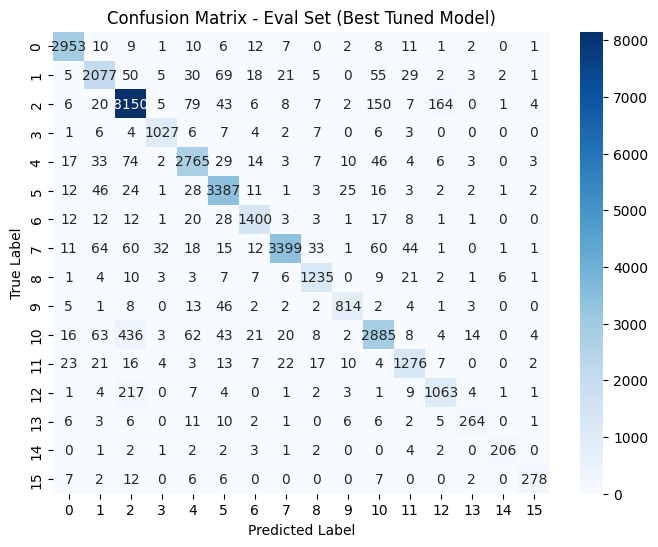

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import numpy as np

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_eval_tensor = torch.tensor(X_eval, dtype=torch.float32)
y_eval_tensor = torch.tensor(y_eval, dtype=torch.long)

# Train/val split
X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(
    X_train_tensor, y_train_tensor, test_size=0.2, random_state=42
)

# Dataloaders
batch_size = 128
train_loader = DataLoader(TensorDataset(X_train_sub, y_train_sub), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_sub, y_val_sub), batch_size=batch_size)

# Optuna Objective
def objective(trial):
    hidden1 = trial.suggest_int("hidden1", 128, 512)
    hidden2 = trial.suggest_int("hidden2", 64, 256)
    hidden3 = trial.suggest_int("hidden3", 32, 128)
    dropout = trial.suggest_float("dropout", 0.3, 0.6)
    lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
    weight_decay = trial.suggest_loguniform("weight_decay", 1e-6, 1e-3)

    class TunedNN(nn.Module):
        def __init__(self, input_dim, num_classes):
            super().__init__()
            self.model = nn.Sequential(
                nn.Linear(input_dim, hidden1),
                nn.BatchNorm1d(hidden1),
                nn.ReLU(),
                nn.Dropout(dropout),
                nn.Linear(hidden1, hidden2),
                nn.BatchNorm1d(hidden2),
                nn.ReLU(),
                nn.Dropout(dropout),
                nn.Linear(hidden2, hidden3),
                nn.BatchNorm1d(hidden3),
                nn.ReLU(),
                nn.Linear(hidden3, num_classes)
            )
        def forward(self, x):
            return self.model(x)

    model = TunedNN(X_train.shape[1], len(np.unique(y_train))).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

    best_loss = float('inf')
    patience_counter = 0
    for epoch in range(100):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            xb = xb + torch.randn_like(xb) * 0.01
            loss = criterion(model(xb), yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        model.eval()
        val_losses = []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                val_losses.append(criterion(model(xb), yb).item())
        val_loss = np.mean(val_losses)
        scheduler.step(val_loss)
        trial.report(val_loss, epoch)

        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

        if val_loss < best_loss:
            best_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= 10:
                break

    return best_loss

# Run optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

# Best parameters
best_params = study.best_trial.params
print("Best Params:", best_params)

# Retrain final model using best parameters
class FinalModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, best_params["hidden1"]),
            nn.BatchNorm1d(best_params["hidden1"]),
            nn.ReLU(),
            nn.Dropout(best_params["dropout"]),
            nn.Linear(best_params["hidden1"], best_params["hidden2"]),
            nn.BatchNorm1d(best_params["hidden2"]),
            nn.ReLU(),
            nn.Dropout(best_params["dropout"]),
            nn.Linear(best_params["hidden2"], best_params["hidden3"]),
            nn.BatchNorm1d(best_params["hidden3"]),
            nn.ReLU(),
            nn.Linear(best_params["hidden3"], len(np.unique(y_train)))
        )
    def forward(self, x):
        return self.model(x)

model = FinalModel(X_train.shape[1], len(np.unique(y_train))).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=best_params["lr"], weight_decay=best_params["weight_decay"])
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

# Final training loop
best_loss = float('inf')
patience_counter = 0
for epoch in range(500):
    model.train()
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        xb = xb + torch.randn_like(xb) * 0.01
        loss = criterion(model(xb), yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    val_losses = []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            val_losses.append(criterion(model(xb), yb).item())
    val_loss = np.mean(val_losses)
    scheduler.step(val_loss)
    print(f"Epoch {epoch+1}, Val Loss: {val_loss:.4f}")

    if val_loss < best_loss:
        best_loss = val_loss
        best_model_state = model.state_dict()
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= 20:
            print("Early stopping.")
            break

# Load best model
model.load_state_dict(best_model_state)

# Evaluation
model.eval()
with torch.no_grad():
    train_logits = model(X_train_tensor.to(device)).cpu().numpy()
    eval_logits = model(X_eval_tensor.to(device)).cpu().numpy()

train_probs = torch.softmax(torch.tensor(train_logits), dim=1).numpy()
eval_probs = torch.softmax(torch.tensor(eval_logits), dim=1).numpy()
y_train_pred = np.argmax(train_probs, axis=1)
y_eval_pred = np.argmax(eval_probs, axis=1)

# Metrics
train_acc = accuracy_score(y_train, y_train_pred)
train_loss_val = log_loss(y_train, train_probs)
train_report = classification_report(y_train, y_train_pred, output_dict=True)
eval_acc = accuracy_score(y_eval, y_eval_pred)
eval_loss_val = log_loss(y_eval, eval_probs)
eval_report = classification_report(y_eval, y_eval_pred, output_dict=True)

# Print
print("\n=== Train Metrics ===")
print(f"Accuracy: {train_acc:.4f} | LogLoss: {train_loss_val:.4f}")
print(f"MacroF1: {train_report['macro avg']['f1-score']:.4f}")
print(f"WeightedF1: {train_report['weighted avg']['f1-score']:.4f}")
print("\n=== Eval Metrics ===")
print(f"Accuracy: {eval_acc:.4f} | LogLoss: {eval_loss_val:.4f}")
print(f"MacroF1: {eval_report['macro avg']['f1-score']:.4f}")
print(f"WeightedF1: {eval_report['weighted avg']['f1-score']:.4f}")

# Confusion matrix
conf = confusion_matrix(y_eval, y_eval_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Eval Set (Best Tuned Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, log_loss, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import optuna
import os

# Ensure clean start
torch.manual_seed(42)
np.random.seed(42)

# Prepare data
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_eval_tensor = torch.tensor(X_eval, dtype=torch.float32).to(device)
y_eval_tensor = torch.tensor(y_eval, dtype=torch.long).to(device)

X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(X_train_tensor, y_train_tensor, test_size=0.2, random_state=42)
batch_size = 128
train_loader = DataLoader(TensorDataset(X_train_sub, y_train_sub), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_sub, y_val_sub), batch_size=batch_size)
test_loader = DataLoader(TensorDataset(X_eval_tensor, y_eval_tensor), batch_size=batch_size)

# --- Custom model definition ---
class CustomModel(nn.Module):
    def __init__(self, input_dim, hidden_layers=None,
                 dropout=0.0, batch_norm=False, layer_norm=False,
                 classes_number=20, device=None):

        super(CustomModel, self).__init__()
        layers = []
        prev_dim = input_dim

        if hidden_layers:
            for hidden_dim in hidden_layers:
                layers.append(nn.Linear(prev_dim, hidden_dim))
                layers.append(nn.ReLU())
                if batch_norm:
                    layers.append(nn.BatchNorm1d(hidden_dim))
                if layer_norm:
                    layers.append(nn.LayerNorm(hidden_dim))
                if dropout > 0:
                    layers.append(nn.Dropout(dropout))
                prev_dim = hidden_dim

        layers.append(nn.Linear(prev_dim, classes_number))
        self.net = nn.Sequential(*layers)

        if device:
            self.to(device)

    def forward(self, x):
        return self.net(x)

# --- Train function ---
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=20, patience=5):
    train_losses, val_losses = [], []
    best_val_loss = float('inf')
    best_model_path = None
    no_improvement_epochs = 0

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                y_pred = model(X_batch)
                loss = criterion(y_pred, y_batch)
                val_loss += loss.item()
        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if best_model_path:
                os.remove(best_model_path)
            best_model_path = f'mlp_best_model_epoch_{epoch+1}.pth'
            torch.save(model.state_dict(), best_model_path)
            no_improvement_epochs = 0
        else:
            no_improvement_epochs += 1

        if no_improvement_epochs >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    model.load_state_dict(torch.load(best_model_path))
    return train_losses, val_losses

# --- Evaluation ---
def evaluate_model(model, test_loader):
    model.eval()
    y_true, y_pred, y_prob = [], [], []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            preds = model(X_batch)
            probs = torch.softmax(preds, dim=1)
            preds = torch.argmax(probs, dim=1)
            y_true.extend(y_batch.tolist())
            y_pred.extend(preds.tolist())
            y_prob.extend(probs.tolist())

    return np.array(y_true), np.array(y_pred), np.array(y_prob)

# --- Optuna objective ---
def objective(trial):
    hidden_layers = [
        trial.suggest_int("hidden1", 128, 512),
        trial.suggest_int("hidden2", 64, 256),
        trial.suggest_int("hidden3", 32, 128)
    ]
    dropout = trial.suggest_float("dropout", 0.2, 0.5)
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-3, log=True)
    batch_norm = trial.suggest_categorical("batch_norm", [True, False])
    layer_norm = trial.suggest_categorical("layer_norm", [True, False])

    model = CustomModel(
        input_dim=X_train.shape[1],
        hidden_layers=hidden_layers,
        dropout=dropout,
        batch_norm=batch_norm,
        layer_norm=layer_norm,
        classes_number=len(np.unique(y_train)),
        device=device
    )

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

    train_model(model, train_loader, val_loader, criterion, optimizer, epochs=50, patience=10)

    y_true, y_pred, y_prob = evaluate_model(model, val_loader)
    return log_loss(y_true, y_prob)

# --- Run Optuna optimization ---
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

# --- Retrain with best params ---
print("Best trial params:", study.best_trial.params)
best = study.best_trial.params

best_model = CustomModel(
    input_dim=X_train.shape[1],
    hidden_layers=[best["hidden1"], best["hidden2"], best["hidden3"]],
    dropout=best["dropout"],
    batch_norm=best["batch_norm"],
    layer_norm=best["layer_norm"],
    classes_number=len(np.unique(y_train)),
    device=device
)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(best_model.parameters(), lr=best["lr"], weight_decay=best["weight_decay"])

train_model(best_model, train_loader, val_loader, criterion, optimizer, epochs=100, patience=20)

# --- Final evaluation ---
y_true, y_pred, y_prob = evaluate_model(best_model, test_loader)

print("\n=== Final Evaluation ===")
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"LogLoss: {log_loss(y_true, y_prob):.4f}")
print(f"MacroF1: {classification_report(y_true, y_pred, output_dict=True)['macro avg']['f1-score']:.4f}")
print(f"WeightedF1: {classification_report(y_true, y_pred, output_dict=True)['weighted avg']['f1-score']:.4f}")

# --- Confusion Matrix ---
conf = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Final Tuned Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


[I 2025-05-06 09:17:32,073] A new study created in memory with name: no-name-54f82106-9eff-4a52-812c-f58cb93ab7ed


Early stopping at epoch 25


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
[I 2025-05-06 09:19:16,224] Trial 0 finished with value: 0.3504991081475916 and parameters: {'hidden1': 493, 'hidden2': 154, 'hidden3': 88, 'dropout': 0.31555444268899085, 'lr': 0.005783150451532039, 'weight_decay': 5.68813060125373e-06, 'batch_norm': True, 'layer_norm': True}. Best is trial 0 with value: 0.3504991081475916.


Early stopping at epoch 38


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
[I 2025-05-06 09:21:31,453] Trial 1 finished with value: 0.3590312587858715 and parameters: {'hidden1': 433, 'hidden2': 107, 'hidden3': 62, 'dropout': 0.4116896000857617, 'lr': 0.006102934945231995, 'weight_decay': 0.000489385900043518, 'batch_norm': False, 'layer_norm': True}. Best is trial 0 with value: 0.3504991081475916.


Early stopping at epoch 23


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
[I 2025-05-06 09:22:45,870] Trial 2 finished with value: 0.3558490136821267 and parameters: {'hidden1': 444, 'hidden2': 241, 'hidden3': 101, 'dropout': 0.29535581204278716, 'lr': 0.0005384456478626422, 'weight_decay': 9.884837447446313e-05, 'batch_norm': False, 'layer_norm': False}. Best is trial 0 with value: 0.3504991081475916.


Early stopping at epoch 25


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
[I 2025-05-06 09:24:14,379] Trial 3 finished with value: 0.3675213449970956 and parameters: {'hidden1': 242, 'hidden2': 133, 'hidden3': 33, 'dropout': 0.28643426258900284, 'lr': 0.0003520414054765952, 'weight_decay': 0.0007698089467374464, 'batch_norm': False, 'layer_norm': True}. Best is trial 0 with value: 0.3504991081475916.


Early stopping at epoch 34


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
[I 2025-05-06 09:26:32,769] Trial 4 finished with value: 0.35208217635020206 and parameters: {'hidden1': 422, 'hidden2': 176, 'hidden3': 53, 'dropout': 0.41460000631135885, 'lr': 0.0010011638892240278, 'weight_decay': 0.000621528583866669, 'batch_norm': True, 'layer_norm': True}. Best is trial 0 with value: 0.3504991081475916.


Early stopping at epoch 22


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
[I 2025-05-06 09:27:44,270] Trial 5 finished with value: 0.3574459182692171 and parameters: {'hidden1': 460, 'hidden2': 194, 'hidden3': 121, 'dropout': 0.2288405527877528, 'lr': 0.0005451839365563315, 'weight_decay': 1.3814895938381404e-05, 'batch_norm': False, 'layer_norm': False}. Best is trial 0 with value: 0.3504991081475916.


Early stopping at epoch 21


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
[I 2025-05-06 09:28:58,344] Trial 6 finished with value: 0.36149051943632954 and parameters: {'hidden1': 317, 'hidden2': 83, 'hidden3': 123, 'dropout': 0.2062798572216591, 'lr': 0.0005229732868025091, 'weight_decay': 4.568233705606774e-05, 'batch_norm': False, 'layer_norm': True}. Best is trial 0 with value: 0.3504991081475916.


Early stopping at epoch 38


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
[I 2025-05-06 09:31:35,047] Trial 7 finished with value: 0.3647714665857683 and parameters: {'hidden1': 418, 'hidden2': 141, 'hidden3': 99, 'dropout': 0.4052762341415984, 'lr': 0.00013724766192077138, 'weight_decay': 0.00038984476144933016, 'batch_norm': True, 'layer_norm': True}. Best is trial 0 with value: 0.3504991081475916.


Early stopping at epoch 41


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
[I 2025-05-06 09:33:59,550] Trial 8 finished with value: 0.36413241154748177 and parameters: {'hidden1': 225, 'hidden2': 192, 'hidden3': 62, 'dropout': 0.41796607947469533, 'lr': 0.0008450568969770438, 'weight_decay': 3.48409584083596e-05, 'batch_norm': False, 'layer_norm': True}. Best is trial 0 with value: 0.3504991081475916.


Early stopping at epoch 30


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
[I 2025-05-06 09:36:03,246] Trial 9 finished with value: 0.35192145796728236 and parameters: {'hidden1': 433, 'hidden2': 196, 'hidden3': 54, 'dropout': 0.35580346958642795, 'lr': 0.00214748164686466, 'weight_decay': 3.715206264949625e-06, 'batch_norm': True, 'layer_norm': True}. Best is trial 0 with value: 0.3504991081475916.


Early stopping at epoch 46


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
[I 2025-05-06 09:38:55,373] Trial 10 finished with value: 0.3832881423067794 and parameters: {'hidden1': 151, 'hidden2': 248, 'hidden3': 84, 'dropout': 0.4731497020083532, 'lr': 0.008714944907525505, 'weight_decay': 1.0097882252080326e-06, 'batch_norm': True, 'layer_norm': False}. Best is trial 0 with value: 0.3504991081475916.


Early stopping at epoch 30


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
[I 2025-05-06 09:41:01,199] Trial 11 finished with value: 0.34941145760442 and parameters: {'hidden1': 511, 'hidden2': 209, 'hidden3': 81, 'dropout': 0.31379041538645047, 'lr': 0.002992630732207996, 'weight_decay': 3.1306365915971053e-06, 'batch_norm': True, 'layer_norm': True}. Best is trial 11 with value: 0.34941145760442.


Early stopping at epoch 30


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
[I 2025-05-06 09:43:06,080] Trial 12 finished with value: 0.35157716208299794 and parameters: {'hidden1': 509, 'hidden2': 214, 'hidden3': 86, 'dropout': 0.3112317019436042, 'lr': 0.0033982881143647496, 'weight_decay': 5.565300401082131e-06, 'batch_norm': True, 'layer_norm': True}. Best is trial 11 with value: 0.34941145760442.


Early stopping at epoch 25


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
[I 2025-05-06 09:44:49,608] Trial 13 finished with value: 0.35381043330530765 and parameters: {'hidden1': 511, 'hidden2': 152, 'hidden3': 101, 'dropout': 0.34320062789181793, 'lr': 0.0026629461823533263, 'weight_decay': 1.2904000415560475e-06, 'batch_norm': True, 'layer_norm': True}. Best is trial 11 with value: 0.34941145760442.


Early stopping at epoch 23


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
[I 2025-05-06 09:46:16,558] Trial 14 finished with value: 0.35621274603006237 and parameters: {'hidden1': 357, 'hidden2': 226, 'hidden3': 75, 'dropout': 0.2543956792641162, 'lr': 0.004506972028048653, 'weight_decay': 4.34511767452601e-06, 'batch_norm': True, 'layer_norm': False}. Best is trial 11 with value: 0.34941145760442.


Early stopping at epoch 31


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
[I 2025-05-06 09:48:23,805] Trial 15 finished with value: 0.3556187751142117 and parameters: {'hidden1': 358, 'hidden2': 163, 'hidden3': 75, 'dropout': 0.3465468590485362, 'lr': 0.0014438499794118445, 'weight_decay': 1.3776192251469576e-05, 'batch_norm': True, 'layer_norm': True}. Best is trial 11 with value: 0.34941145760442.


Early stopping at epoch 28


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
[I 2025-05-06 09:50:19,611] Trial 16 finished with value: 0.36208683351423177 and parameters: {'hidden1': 482, 'hidden2': 117, 'hidden3': 110, 'dropout': 0.2610334425801664, 'lr': 0.008191358691468677, 'weight_decay': 8.873546875862784e-06, 'batch_norm': True, 'layer_norm': True}. Best is trial 11 with value: 0.34941145760442.


Early stopping at epoch 30


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
[I 2025-05-06 09:52:22,628] Trial 17 finished with value: 0.35486533670054743 and parameters: {'hidden1': 378, 'hidden2': 170, 'hidden3': 91, 'dropout': 0.37183760009748196, 'lr': 0.004546633362927784, 'weight_decay': 2.264351362989979e-06, 'batch_norm': True, 'layer_norm': True}. Best is trial 11 with value: 0.34941145760442.


Early stopping at epoch 27


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
[I 2025-05-06 09:54:04,496] Trial 18 finished with value: 0.3526370930132882 and parameters: {'hidden1': 282, 'hidden2': 214, 'hidden3': 74, 'dropout': 0.3156836038730592, 'lr': 0.0016941600511146192, 'weight_decay': 2.191525233601158e-06, 'batch_norm': True, 'layer_norm': False}. Best is trial 11 with value: 0.34941145760442.


Early stopping at epoch 34


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
[I 2025-05-06 09:56:24,316] Trial 19 finished with value: 0.3732032987736641 and parameters: {'hidden1': 383, 'hidden2': 81, 'hidden3': 34, 'dropout': 0.45823664490409644, 'lr': 0.0033740393006456417, 'weight_decay': 7.474339146639573e-05, 'batch_norm': True, 'layer_norm': True}. Best is trial 11 with value: 0.34941145760442.


Early stopping at epoch 30


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
[I 2025-05-06 09:58:28,331] Trial 20 finished with value: 0.35588892409145084 and parameters: {'hidden1': 477, 'hidden2': 114, 'hidden3': 93, 'dropout': 0.2666733769498566, 'lr': 0.005697089287185694, 'weight_decay': 1.957364678628039e-05, 'batch_norm': True, 'layer_norm': True}. Best is trial 11 with value: 0.34941145760442.


Early stopping at epoch 30


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
[I 2025-05-06 10:00:32,988] Trial 21 finished with value: 0.34274606937480234 and parameters: {'hidden1': 510, 'hidden2': 217, 'hidden3': 86, 'dropout': 0.31588737922801446, 'lr': 0.003192962446050869, 'weight_decay': 6.236824372070913e-06, 'batch_norm': True, 'layer_norm': True}. Best is trial 21 with value: 0.34274606937480234.
[W 2025-05-06 10:00:52,811] Trial 22 failed with parameters: {'hidden1': 512, 'hidden2': 224, 'hidden3': 82, 'dropout': 0.3267358840915788, 'lr': 0.002938642028779138, 'weight_decay': 6.680901003738035e-06, 'batch_norm': True, 'layer_norm': True} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                  

KeyboardInterrupt: 

### Transformes

In [ ]:
# === Required Imports ===
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_scheduler
from torch.optim import AdamW
from sklearn.metrics import accuracy_score, classification_report, log_loss, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
from tqdm import tqdm

# === Config ===
MODEL_NAME = 'microsoft/mpnet-base'
BATCH_SIZE = 16
EPOCHS = 3
MAX_LEN = 128
LEARNING_RATE = 2e-5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === Load CSV Data ===
def load_data(filename):
    ids, texts, labels = [], [], []
    skipped = 0
    with open(filename, "r", encoding="utf-8") as f:
        reader = csv.DictReader(f)
        for row in reader:
            try:
                product_id = int(row["product_id"])
                label = int(row["label"])
                text = row["text_clean"]
                if not text.strip():
                    skipped += 1
                    continue
                ids.append(product_id)
                texts.append(text)
                labels.append(label)
            except Exception:
                skipped += 1
                continue
    return ids, texts, labels, skipped

train_ids, train_texts, train_labels, skipped_train = load_data("train.csv")
eval_ids, eval_texts, eval_labels, skipped_eval = load_data("test.csv")
print(f"Skipped {skipped_train} bad training rows, {skipped_eval} bad eval rows.")

# === Tokenizer ===
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# === Dataset ===
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.encodings = tokenizer(texts, padding=True, truncation=True, max_length=max_len)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TextDataset(train_texts, train_labels, tokenizer, MAX_LEN)
eval_dataset = TextDataset(eval_texts, eval_labels, tokenizer, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=BATCH_SIZE)

# === Model ===
num_classes = len(set(train_labels))
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=num_classes)
model.to(device)

# === Optimizer & Scheduler ===
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
num_training_steps = len(train_loader) * EPOCHS
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# === Training Loop ===
best_loss = float("inf")
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
    avg_train_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1} - Train Loss: {avg_train_loss:.4f}")

# === Evaluation Function ===
def evaluate(model, loader):
    model.eval()
    all_preds, all_probs, all_labels = [], [], []
    with torch.no_grad():
        for batch in loader:
            labels = batch['labels']
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            logits = outputs.logits.cpu()
            probs = torch.softmax(logits, dim=1).numpy()
            preds = np.argmax(probs, axis=1)

            all_labels.extend(labels.numpy())
            all_preds.extend(preds)
            all_probs.extend(probs)
    return np.array(all_labels), np.array(all_preds), np.array(all_probs)

# === Evaluate Train and Eval ===
y_train_true, y_train_pred, y_train_proba = evaluate(model, train_loader)
y_eval_true, y_eval_pred, y_eval_proba = evaluate(model, eval_loader)

# === Metrics Display ===
def print_metrics(true, pred, proba, name):
    acc = accuracy_score(true, pred)
    loss = log_loss(true, proba)
    report = classification_report(true, pred, output_dict=True)
    print(f"\n=== {name} Set ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"LogLoss: {loss:.4f}")
    print(f"MacroF1: {report['macro avg']['f1-score']:.4f}")
    print(f"WeightedF1: {report['weighted avg']['f1-score']:.4f}")
    return acc, loss

train_acc, train_loss = print_metrics(y_train_true, y_train_pred, y_train_proba, "Train")
eval_acc, eval_loss = print_metrics(y_eval_true, y_eval_pred, y_eval_proba, "Eval")

# === Confusion Matrix ===
conf = confusion_matrix(y_eval_true, y_eval_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Eval Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# === Accuracy vs LogLoss Bar Plot ===
metrics = ['Accuracy', 'Log Loss']
train_scores = [train_acc, train_loss]
eval_scores = [eval_acc, eval_loss]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, train_scores, width, label='Train')
plt.bar(x + width/2, eval_scores, width, label='Eval')
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Train vs Eval Performance (Transformer Fine-tuning)")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Skipped 1 bad training rows, 1 bad eval rows.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/493 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/472k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/532M [00:00<?, ?B/s]

Some weights of MPNetForSequenceClassification were not initialized from the model checkpoint at microsoft/mpnet-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1: 100%|██████████| 9101/9101 [55:31<00:00,  2.73it/s]


Epoch 1 - Train Loss: 0.5897


Epoch 2:  87%|████████▋ | 7902/9101 [48:10<07:15,  2.75it/s]

In [ ]:
!pip install optuna

### Tune

### Upload

- NN dirent intiializations
- bagging NN
- nn DIFFRENT PARAMETERS ARCHITECTURES (LAYERS, DROPOUT,GRADIETS...) --> COMBINE ---> BETETR PERFORMANCE
- (-) many models resources  
- `voting` (cnn + svm + knn) sos
- `stacking` (3 models ) sos
- Bagging